# Support Vector Classifier (SVC) Implementation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Create Dataset
from sklearn.datasets import make_classification

In [3]:
X,y=make_classification(n_samples=1000,n_classes=2,n_features=2,n_clusters_per_class=2,n_redundant=0)

In [4]:
X

array([[-0.85128592,  0.54136941],
       [-0.66607668,  1.26801033],
       [-0.45535046, -1.63046106],
       ...,
       [-1.6634519 ,  1.07823304],
       [-0.31026668,  0.41064346],
       [ 1.23424661, -0.38917005]])

In [5]:
y

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [6]:
pd.DataFrame(X)[0]

0     -0.851286
1     -0.666077
2     -0.455350
3      1.066928
4      1.228673
         ...   
995   -1.234494
996   -1.072238
997   -1.663452
998   -0.310267
999    1.234247
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

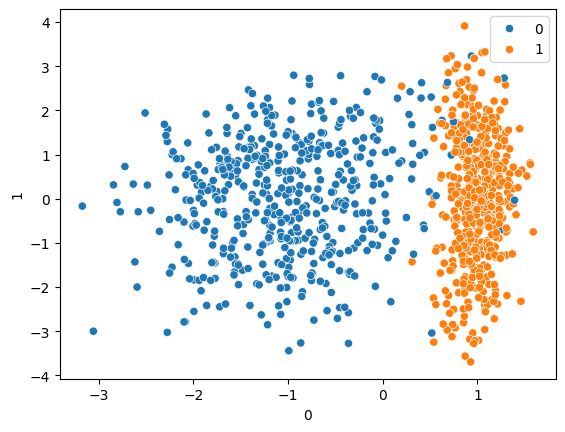

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.svm import SVC

In [10]:
svc=SVC(kernel='linear')

In [11]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [12]:
svc.coef_  #Slope

array([[ 3.7177776 , -0.13015427]])

In [13]:
y_pred=svc.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [15]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        97
           1       0.95      0.99      0.97       103

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [16]:
# Accuracy Score
print(accuracy_score(y_test,y_pred))

0.97


In [17]:
# Confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[ 92   5]
 [  1 102]]


#### Hyperparameter Tuning with SVC

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
parameter={
    'C' : [0.1,1,10,100,1000],
    'gamma' : [1,0.1,0.01,0.001,0.0001],
    'kernel' : ['linear']
}

In [20]:
grid=GridSearchCV(SVC(),param_grid=parameter,cv=5,verbose=3,refit=True)

In [21]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.988 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.994 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.969 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.994 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.969 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.975 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.975 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.988 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [22]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'linear'}

In [23]:
y_pred_grid=grid.predict(X_test)

In [24]:
#Classification Report
print(classification_report(y_test,y_pred_grid))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        97
           1       0.95      0.99      0.97       103

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [25]:
# Accuracy Score
print(accuracy_score(y_test,y_pred_grid))

0.97


In [26]:
# Confusion Matrix
print(confusion_matrix(y_test,y_pred_grid))

[[ 92   5]
 [  1 102]]


In [27]:
grid_clf=SVC(C=1,gamma=1,kernel='linear')

In [28]:
grid_clf.fit(X_train,y_train)

SVC(C=1, gamma=1, kernel='linear')

In [29]:
y_pred_grid_clf=grid_clf.predict(X_test)

In [30]:
#Classification Report
print(classification_report(y_test,y_pred_grid_clf))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        97
           1       0.95      0.99      0.97       103

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [31]:
# Accuracy Score
print(accuracy_score(y_test,y_pred_grid_clf))

0.97


In [32]:
# Confusion Matrix
print(confusion_matrix(y_test,y_pred_grid_clf))

[[ 92   5]
 [  1 102]]
